<a href="https://colab.research.google.com/github/Farivini/KNN_exemplo_uso/blob/main/KNN_uso_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

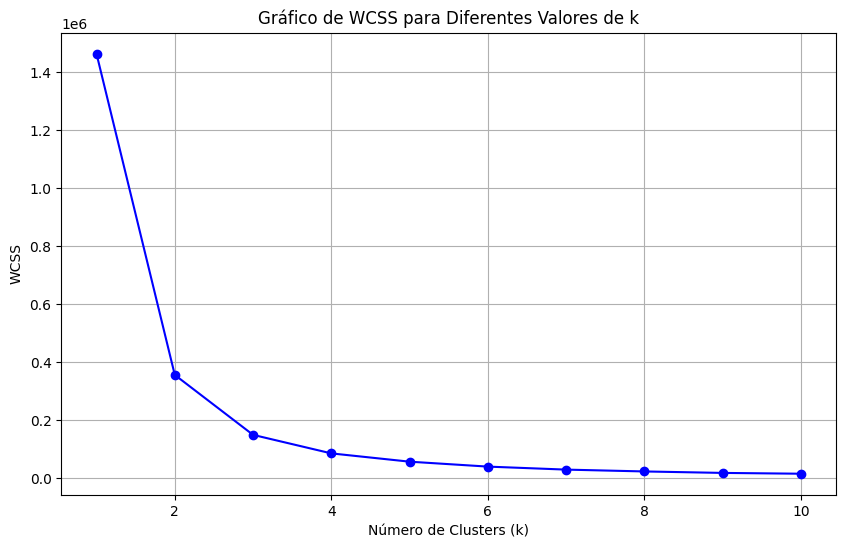

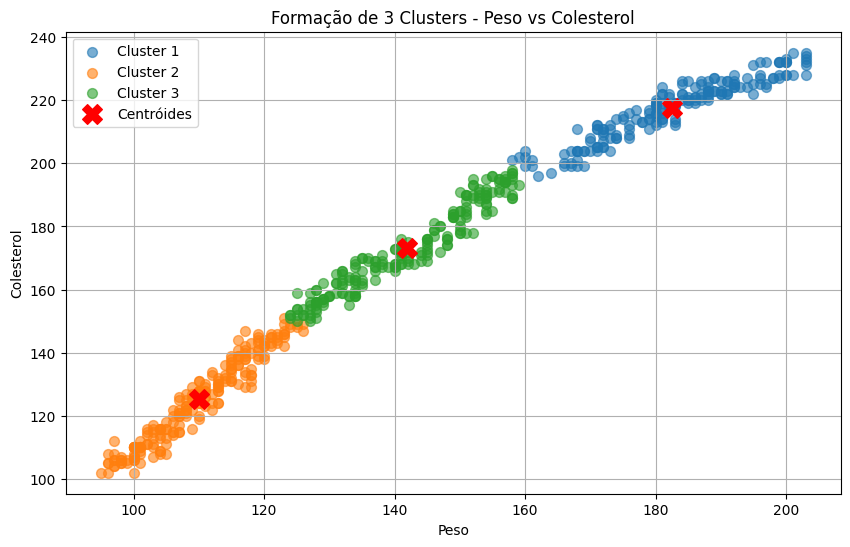

<ipython-input-3-061e4bbeb799>:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_pacientes[col].fillna(media_arredondada, inplace=True)
<ipython-input-3-061e4bbeb799>:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

cluster
0    38.26257
1    38.37561
2    37.19403
Name: idade, dtype: float64


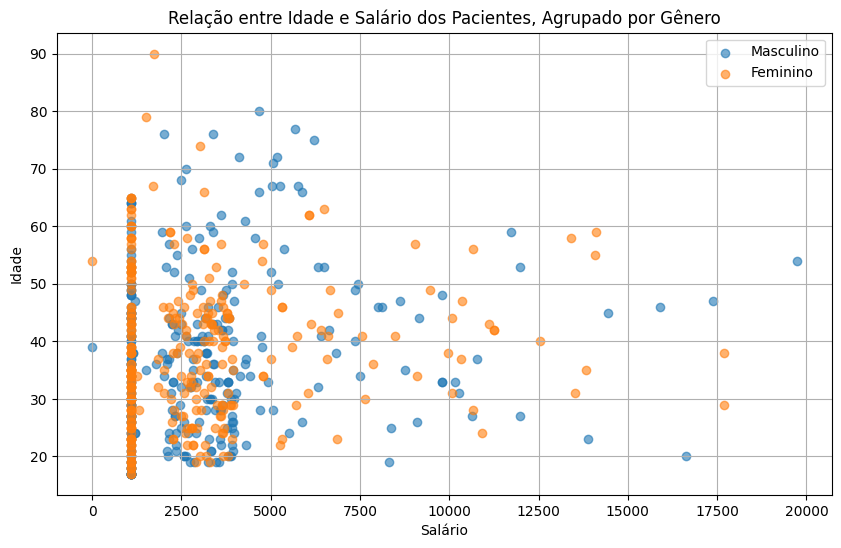

Média salarial na região Nordeste: 3428.7555555555555
Estado com maior média de idade na região Nordeste: Piauí
Estado com maior número de pacientes com Mestrado: Santa Catarina
Valor de MAE: 10.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar os dados dos pacientes
# Supondo que temos um arquivo CSV com as informações de 'peso', 'colesterol', 'idade', 'classe_trabalho', 'escolaridade', etc.
dados_clinicos = pd.read_csv('dados_clinicos.csv', sep=';')

# Pergunta: Foram identificados dados duplicados nos datasets?
# Tratamento dos dados
# Excluir dados ausentes (no caso dos dados clínicos)
dados_clinicos.dropna(inplace=True)

# Selecionar as variáveis 'peso' e 'colesterol' para análise
X = dados_clinicos[['peso', 'colesterol']]

# Pergunta: Elabore o gráfico de WCSS (Within-Cluster Sum of Squares) com as variáveis peso e colesterol para um conjunto de 10 clusters.
# Lista para armazenar os valores de WCSS
wcss = []

# Calcular WCSS para um conjunto de 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico de WCSS
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Gráfico de WCSS para Diferentes Valores de k')
plt.grid(True)
plt.show()

# Pergunta: Produza uma representação gráfica da formação de 3 clusters com base no peso e colesterol dos clientes.
# Aplicar KMeans para formar 3 clusters usando peso e colesterol
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plotar os clusters formados
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0]['peso'], X[y_kmeans == 0]['colesterol'], s=50, label='Cluster 1', alpha=0.6)
plt.scatter(X[y_kmeans == 1]['peso'], X[y_kmeans == 1]['colesterol'], s=50, label='Cluster 2', alpha=0.6)
plt.scatter(X[y_kmeans == 2]['peso'], X[y_kmeans == 2]['colesterol'], s=50, label='Cluster 3', alpha=0.6)

# Plotar os centróides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centróides')

# Configurações do gráfico
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.title('Formação de 3 Clusters - Peso vs Colesterol')
plt.legend()
plt.grid(True)
plt.show()

# Pergunta: Entre todos os estados, qual deles apresenta o maior número de pacientes com grau de escolaridade 'Mestrado'?
# Calcular a média de idade para cada cluster
dados_clinicos['cluster'] = y_kmeans


# Tratamento de dados ausentes na base de pacientes
# Para dados numéricos, preencher com a média arredondada
# Para dados categóricos, preencher com a moda
dados_pacientes = pd.read_csv('dados_pacientes.csv', sep=';')
for col in dados_pacientes.select_dtypes(include=['int64', 'float64']):
    if dados_pacientes[col].isna().sum() > 0:
        media_arredondada = round(dados_pacientes[col].mean())
        dados_pacientes[col].fillna(media_arredondada, inplace=True)
for col in dados_pacientes.select_dtypes(include=['object']):
    if dados_pacientes[col].isna().sum() > 0:
        moda = dados_pacientes[col].mode()[0]
        dados_pacientes[col].fillna(moda, inplace=True)

# Tratamento de dados ausentes na base de estados
dados_estado_regiao = pd.read_csv('estado_regiao.csv', sep=';',encoding='latin1')
for col in dados_estado_regiao.select_dtypes(include=['int64', 'float64']):
    if dados_estado_regiao[col].isna().sum() > 0:
        media_arredondada = round(dados_estado_regiao[col].mean())
        dados_estado_regiao[col].fillna(media_arredondada, inplace=True)
for col in dados_estado_regiao.select_dtypes(include=['object']):
    if dados_estado_regiao[col].isna().sum() > 0:
        moda = dados_estado_regiao[col].mode()[0]
        dados_estado_regiao[col].fillna(moda, inplace=True)

# Pergunta: Após a conclusão do processo de integração de dados, qual foi o total final de registros presentes no dataframe resultante?
# Integração das bases de dados
dados_integrados = pd.merge(dados_pacientes, dados_clinicos, on='id_cliente', how='inner')
dados_integrados_completos = pd.merge(dados_integrados, dados_estado_regiao, left_on='id_estado', right_on='id_estado', how='inner')
media_idade_clusters = dados_integrados.groupby('cluster')['idade'].mean()
print(media_idade_clusters)


# Pergunta: Elabore um gráfico de dispersão que represente a relação entre a idade e os salários de todos os pacientes, agrupados por gênero.
# Gráfico de dispersão para representar a relação entre idade e salário, agrupado por gênero
plt.figure(figsize=(10, 6))
masculino = dados_integrados_completos[dados_integrados_completos['genero'] == 'Masculino']
plt.scatter(masculino['salario'], masculino['idade'], label='Masculino', alpha=0.6)
feminino = dados_integrados_completos[dados_integrados_completos['genero'] == 'Feminino']
plt.scatter(feminino['salario'], feminino['idade'], label='Feminino', alpha=0.6)
plt.xlabel('Salário')
plt.ylabel('Idade')
plt.title('Relação entre Idade e Salário dos Pacientes, Agrupado por Gênero')
plt.legend()
plt.grid(True)
plt.show()

# Pergunta: Qual é a média salarial para os residentes na região Nordeste?
# Calcular a média salarial para os residentes na região Nordeste
nordeste_pacientes = dados_integrados_completos[dados_integrados_completos['regiao'] == 'Nordeste']
media_salarial_nordeste = nordeste_pacientes['salario'].mean()
print(f"Média salarial na região Nordeste: {media_salarial_nordeste}")

# Pergunta: Entre os estados da região Nordeste, qual se destaca pelo maior valor na média das idades?
# Calcular a média de idade por estado na região Nordeste
nordeste_pacientes_por_estado = nordeste_pacientes.groupby('estado')['idade'].mean()
estado_maior_media_idade = nordeste_pacientes_por_estado.idxmax()
print(f"Estado com maior média de idade na região Nordeste: {estado_maior_media_idade}")

# Pergunta: Entre todos os estados, qual deles apresenta o maior número de pacientes com grau de escolaridade 'Mestrado'?
# Contar o número de pacientes com escolaridade 'Mestrado' por estado
pacientes_mestrado_por_estado = dados_integrados_completos[dados_integrados_completos['escolaridade'] == 'Mestrado']
contagem_mestrado_por_estado = pacientes_mestrado_por_estado['estado'].value_counts()
estado_mais_mestrados = contagem_mestrado_por_estado.idxmax()
print(f"Estado com maior número de pacientes com Mestrado: {estado_mais_mestrados}")

# Pergunta: Sobre a MAE, indique a opção que contém sua equação.
# MAE - Mean Absolute Error
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Exemplo fictício de como calcular MAE
y_true = np.array([100, 200, 300])
y_pred = np.array([110, 190, 290])
mae_value = mae(y_true, y_pred)
print(f"Valor de MAE: {mae_value}")
